In [277]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [278]:
from statsmodels.tsa.arima_model import ARMA

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from statsmodels.tsa.seasonal import seasonal_decompose

In [279]:
arma_df = pd.read_csv(r'C:\Users\James Stanley\Documents\GitHub\backtest_utilities\data\daily\commodities\corn\CBOT_DL_ZC1!, 1D b_adjust.csv',index_col='time', parse_dates=True)

In [280]:
arma_df.head(10)

,open,high,low,close,Commercials long,Commercials short,Commercials net,Large Speculators long,Large Speculators short,Large Speculators net,...,OI,Commercials long.1,Commercials short.1,Commercials net.1,Large Speculators long.1,Large Speculators short.1,Large Speculators net.1,Small Speculators long.1,Small Speculators short.1,Small Speculators net.1
time,,,,,,,,,,,,,,,,,,,,,
1970-01-05 01:00:00+00:00,816.125,816.250,815.625,815.750,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-06 01:00:00+00:00,815.875,816.125,815.500,816.000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-07 01:00:00+00:00,816.375,816.625,816.125,816.500,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-08 01:00:00+00:00,816.875,817.250,816.625,817.125,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-09 01:00:00+00:00,816.875,816.875,816.250,816.250,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-12 01:00:00+00:00,816.125,816.875,815.750,816.625,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-13 01:00:00+00:00,816.875,817.250,816.125,816.250,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-14 01:00:00+00:00,816.250,816.750,816.125,816.500,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-15 01:00:00+00:00,816.500,816.875,816.375,816.750,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [281]:
print(len(arma_df))

13335


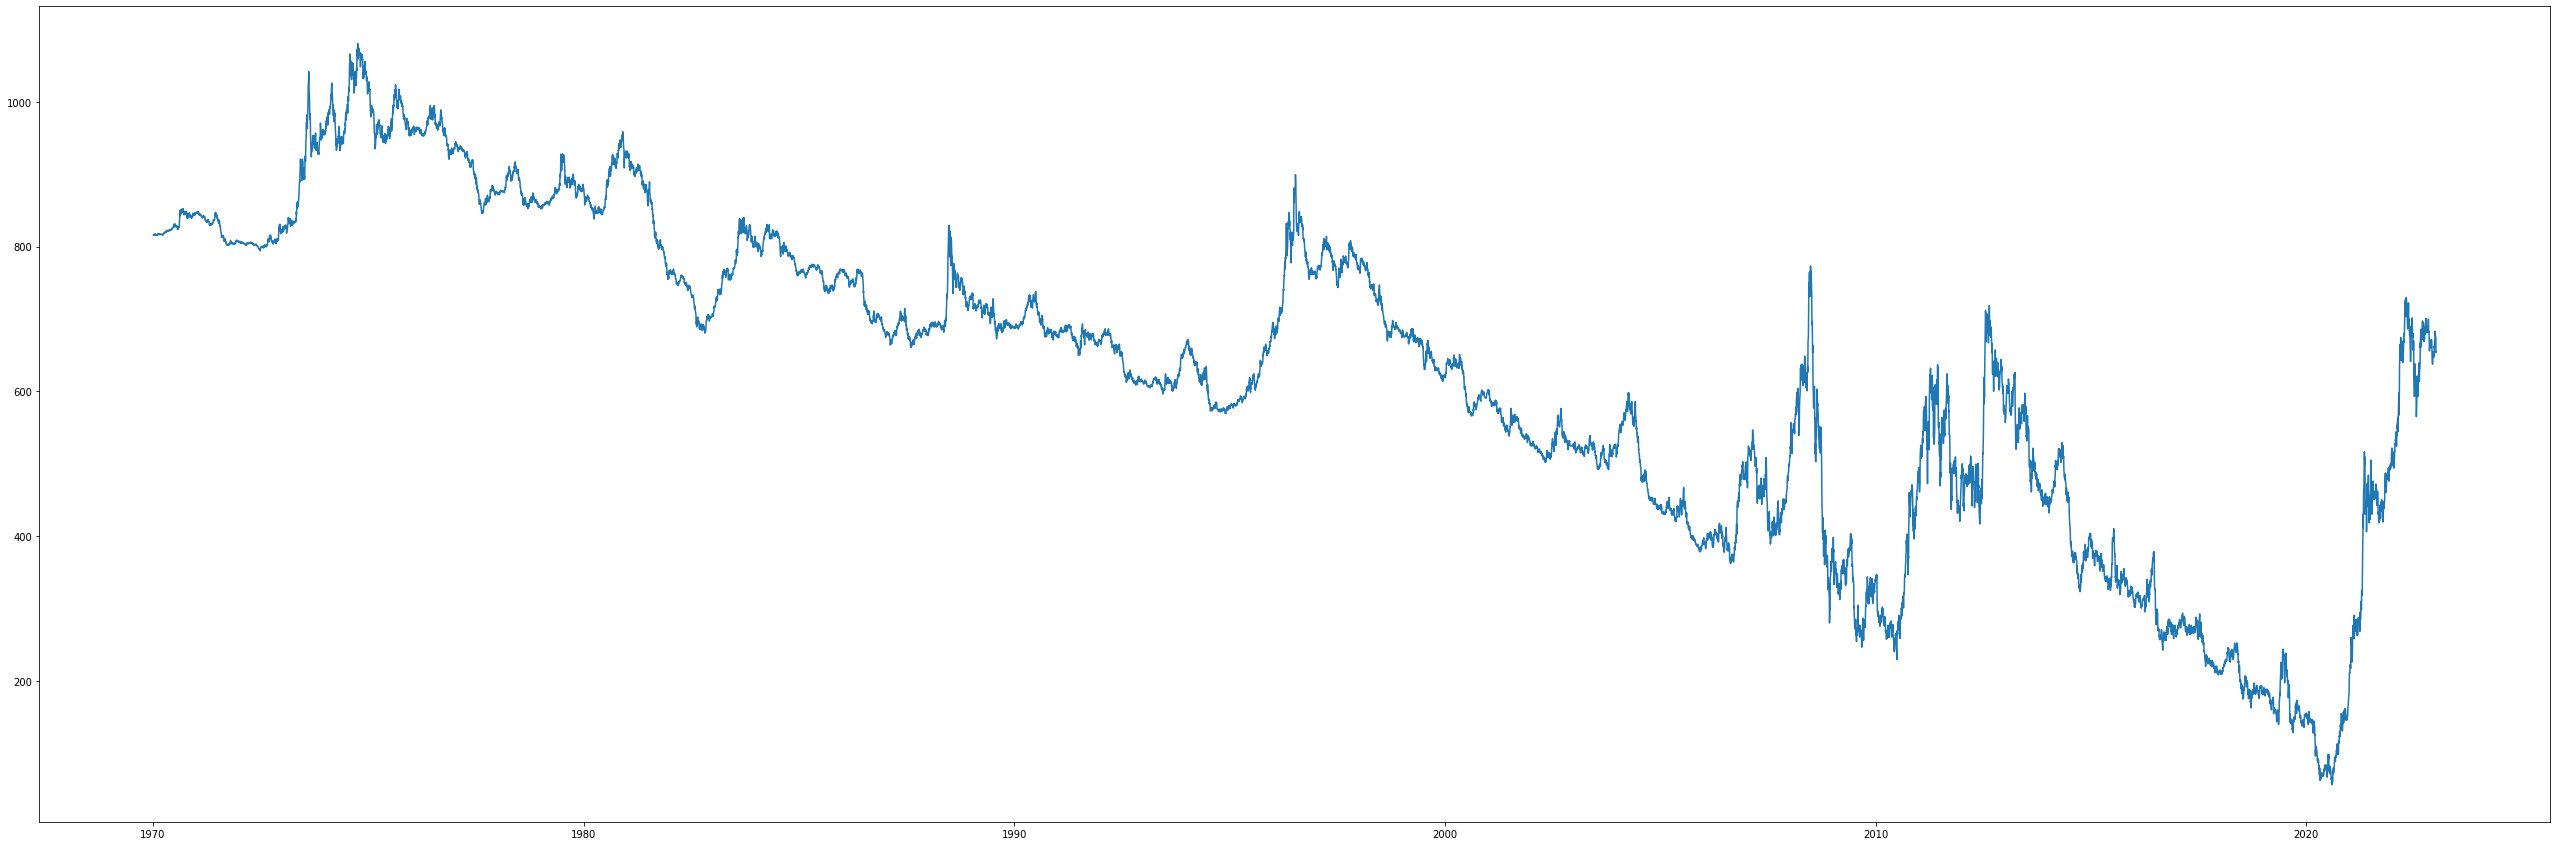

In [282]:
plt.figure(figsize=(45,15))
plt.plot(arma_df['close'])
plt.show()

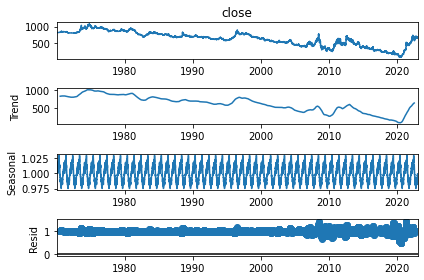

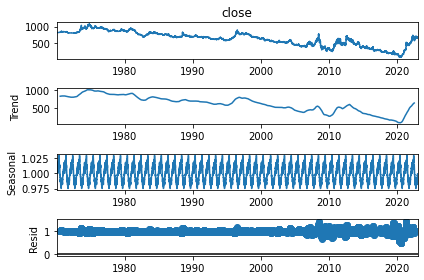

In [283]:

seasonal_result = seasonal_decompose(arma_df['close'], model="multiplicative",period=252)

trend = seasonal_result.trend
seasonal = seasonal_result.seasonal
corn_residual = seasonal_result.resid

seasonal_result.plot()

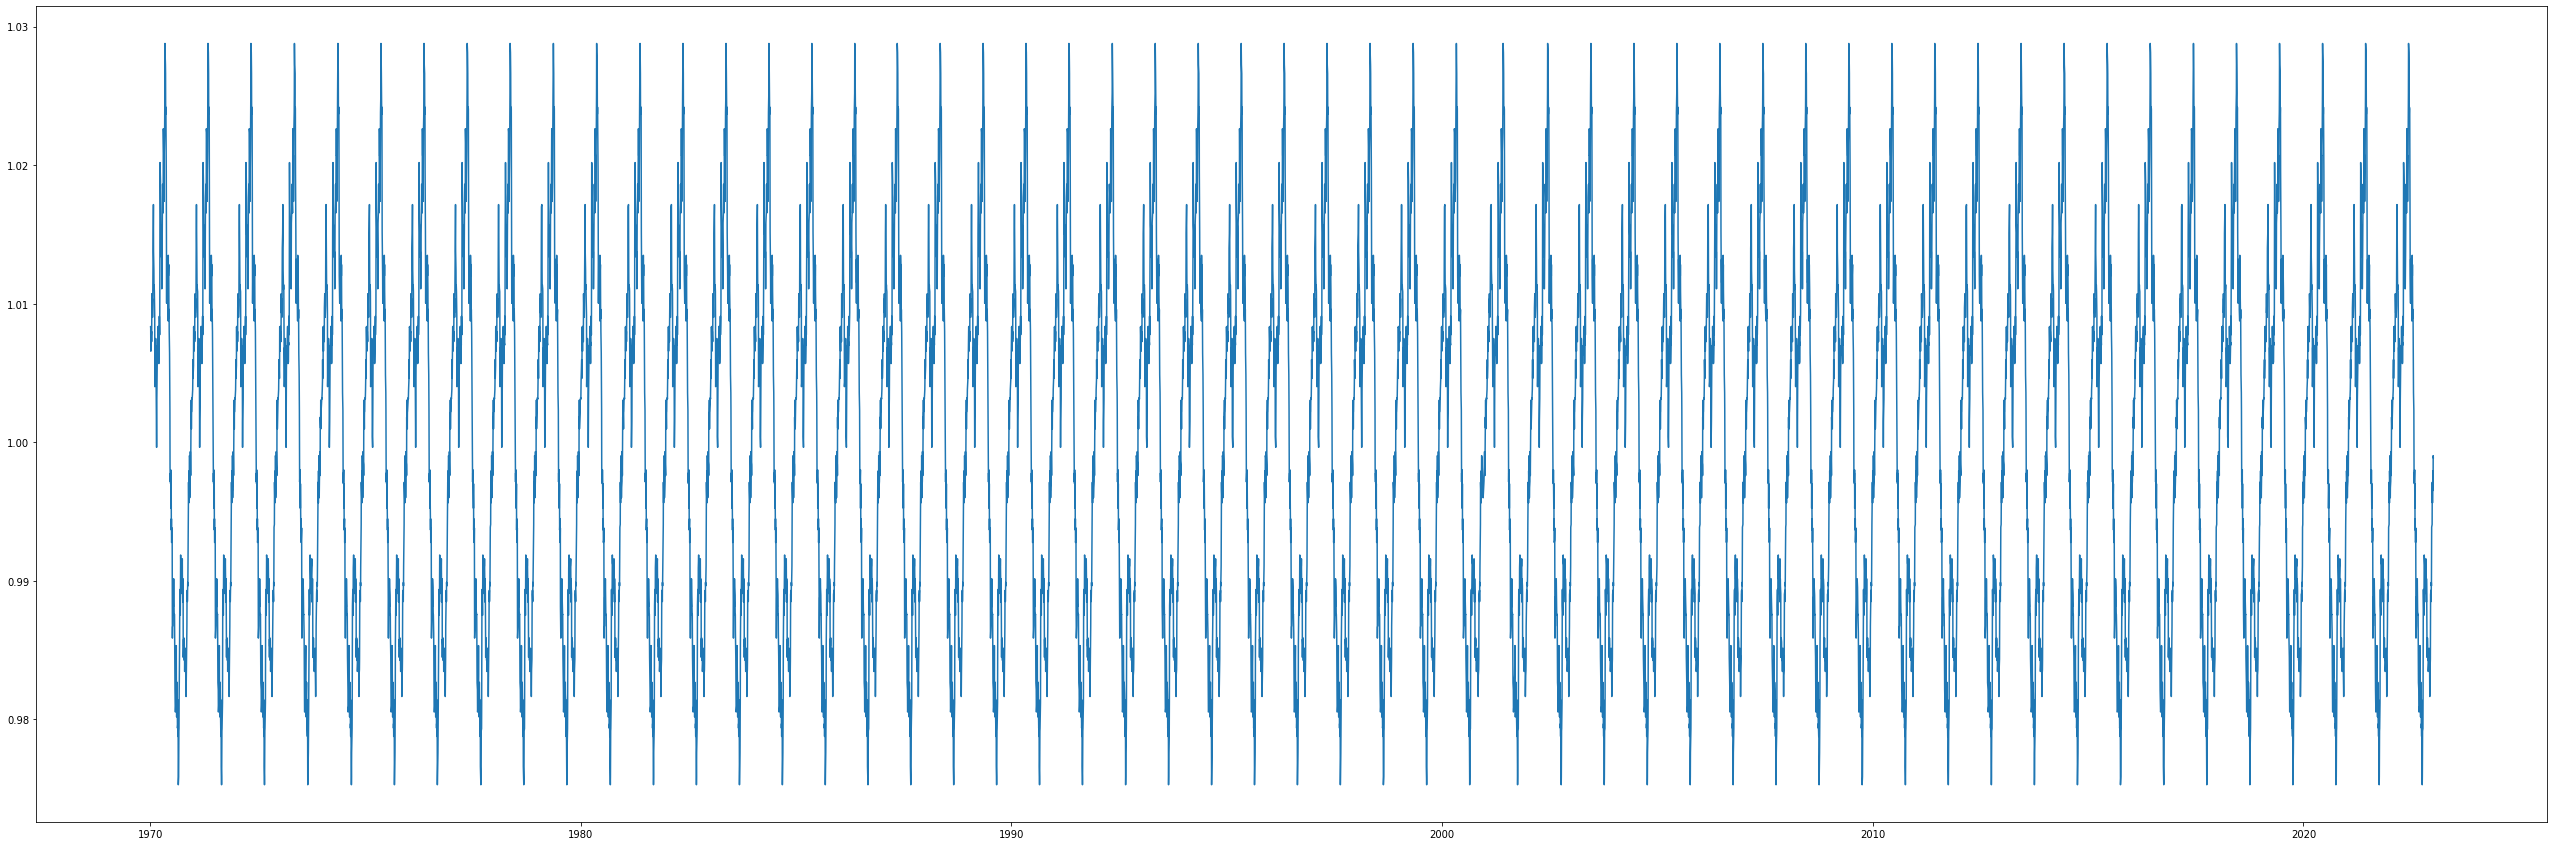

In [284]:
plt.figure(figsize=(45,15))

plt.plot(seasonal)

plt.show()

In [285]:
log_diff = np.log(arma_df['close']).diff(1).dropna(axis=0)

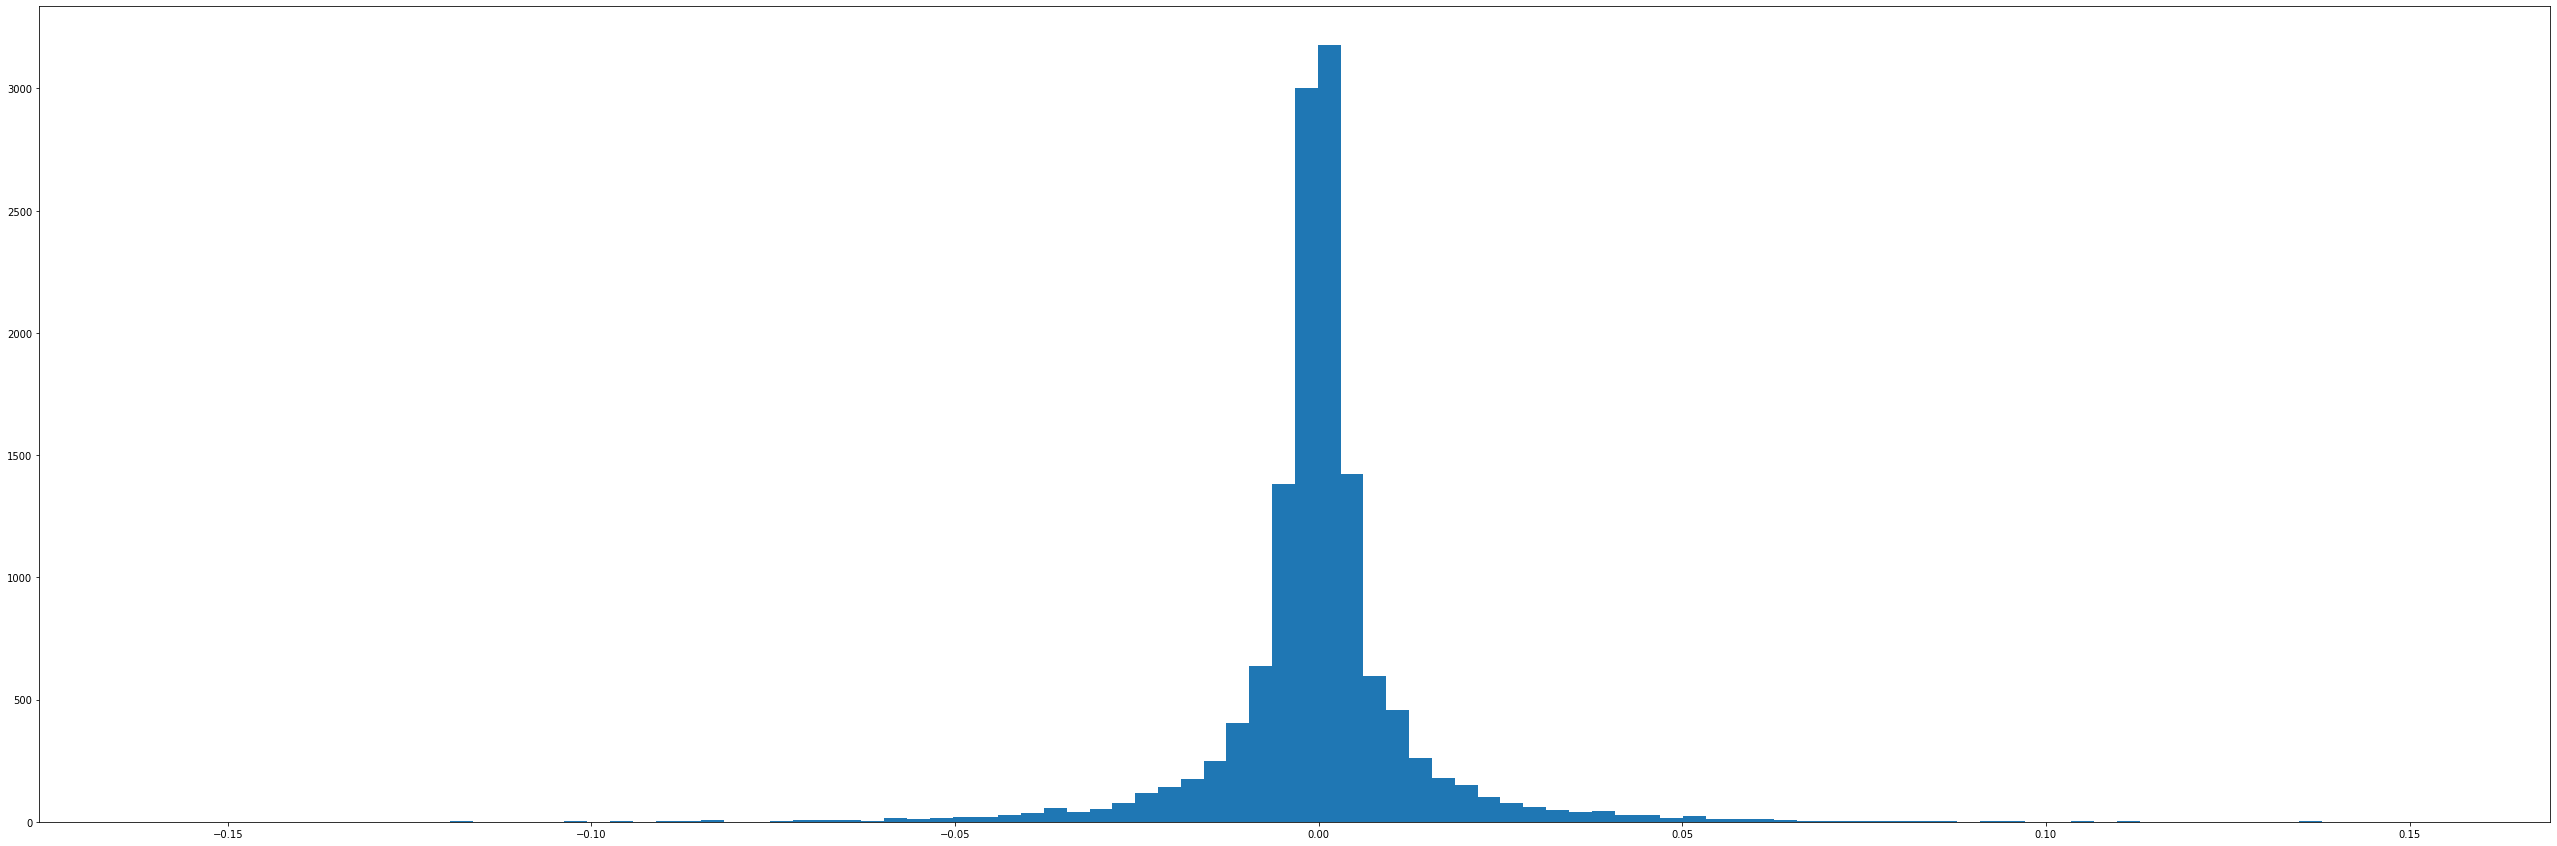

In [286]:
plt.figure(figsize=(45,15))

plt.hist(log_diff,bins=100)

plt.show()

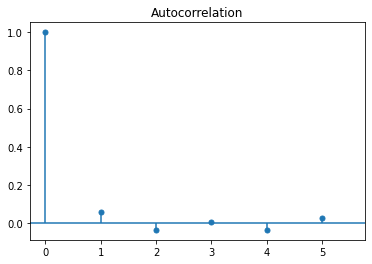

In [287]:
plot_acf(log_diff, alpha=1, lags=5).savefig("acf.jpg")

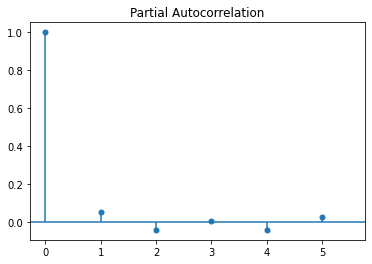

In [288]:
plot_pacf(log_diff, alpha=1, lags=5).savefig("pacf.jpg")